In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/stud.csv')
df.shape

(1000, 8)

1. Missing Values --> No missing values
2. Duplicate Values --> No duplicates
3. Data Type -->  5 categorical and 3 numeric type columns
4. Number of unique_values 
5. Statistics of Dataset
6. Various categories in different categorical columns

{'gender': 2,
 'race_ethnicity': 5,
 'parental_level_of_education': 6,
 'lunch': 2,
 'test_preparation_course': 2,
 'math_score': 81,
 'reading_score': 72,
 'writing_score': 77}

Description of Dataset statistics

 	math_score	reading_score	writing_score
count	1000.00000	1000.000000	1000.000000
mean	66.08900	69.169000	68.054000
std	15.16308	14.600192	15.195657
min	0.00000	17.000000	10.000000
25%	57.00000	59.000000	57.750000
50%	66.00000	70.000000	69.000000
75%	77.00000	79.000000	79.000000
max	100.00000	100.000000	100.000000

In [3]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [7]:
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].nunique()

unique_values

{'gender': 2,
 'race_ethnicity': 5,
 'parental_level_of_education': 6,
 'lunch': 2,
 'test_preparation_course': 2,
 'math_score': 81,
 'reading_score': 72,
 'writing_score': 77}

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
unique_vals_column = {}
for column in df.columns:
    unique_vals_column[column] = df[column].unique()

unique_vals_column

{'gender': array(['female', 'male'], dtype=object),
 'race_ethnicity': array(['group B', 'group C', 'group A', 'group D', 'group E'],
       dtype=object),
 'parental_level_of_education': array(["bachelor's degree", 'some college', "master's degree",
        "associate's degree", 'high school', 'some high school'],
       dtype=object),
 'lunch': array(['standard', 'free/reduced'], dtype=object),
 'test_preparation_course': array(['none', 'completed'], dtype=object),
 'math_score': array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
         50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
         97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
         39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
         98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
         35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
         19,  23,   8]),
 'reading_score': array([ 72,  90,  95,  57,  78,  

In [10]:
# Categorizing into numeric and categorical columns.
numeical_cols = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_cols = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f"The numerical columns are {numeical_cols}")
print(f"The categorical columns are {categorical_cols}")

The numerical columns are ['math_score', 'reading_score', 'writing_score']
The categorical columns are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [11]:
# Adding columns for total_score and average
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


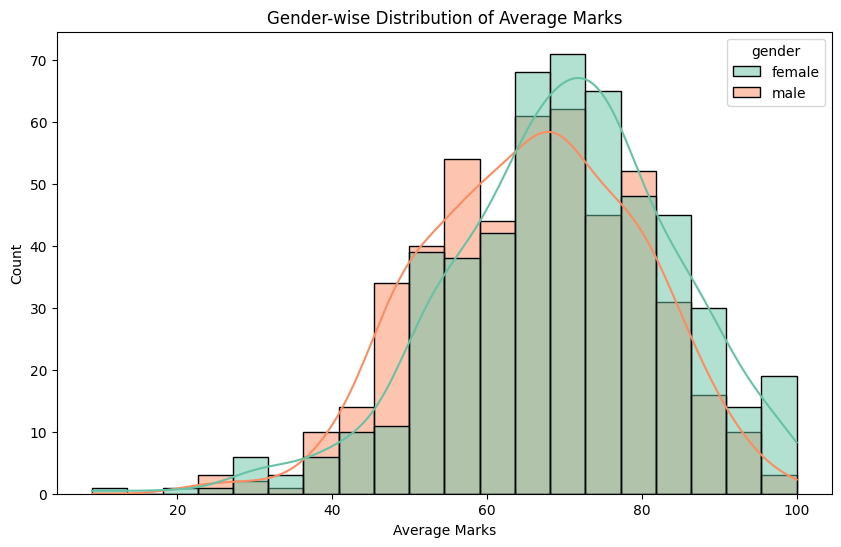

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='average_score', hue='gender', bins=20, kde=True, palette='Set2')
plt.title('Gender-wise Distribution of Average Marks')
plt.xlabel('Average Marks')
plt.ylabel('Count')
plt.show()

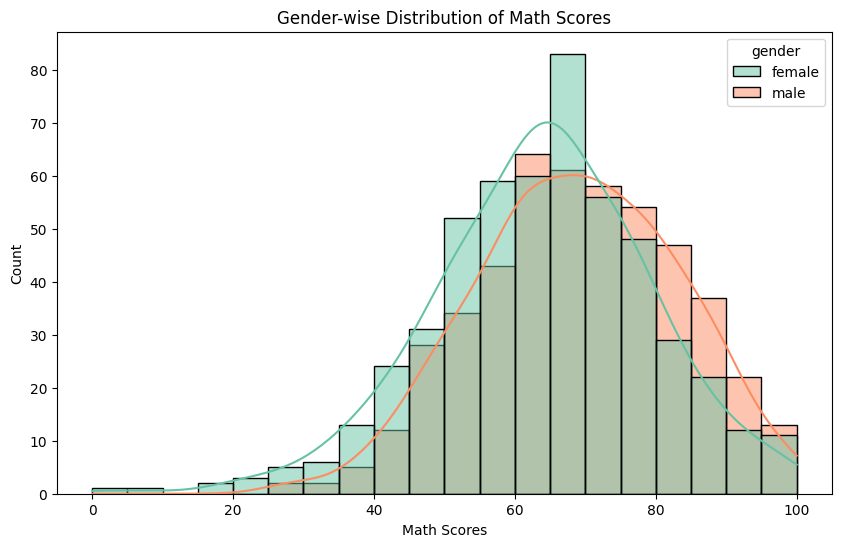

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='math_score', hue='gender', bins=20, kde=True, palette='Set2')
plt.title('Gender-wise Distribution of Math Scores')
plt.xlabel('Math Scores')
plt.ylabel('Count')
plt.show()

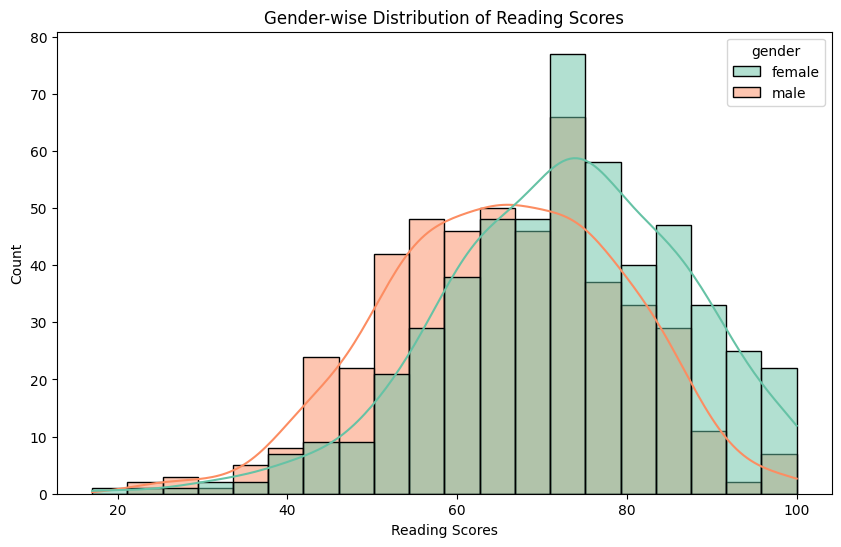

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='reading_score', hue='gender', bins=20, kde=True, palette='Set2')
plt.title('Gender-wise Distribution of Reading Scores')
plt.xlabel('Reading Scores')
plt.ylabel('Count')
plt.show()

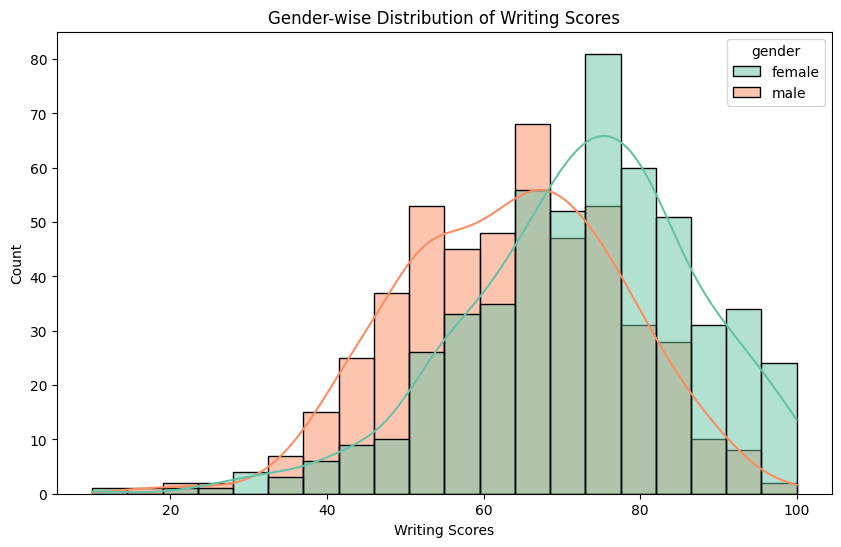

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='writing_score', hue='gender', bins=20, kde=True, palette='Set2')
plt.title('Gender-wise Distribution of Writing Scores')
plt.xlabel('Writing Scores')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Number of people aving lunvh gender wise')

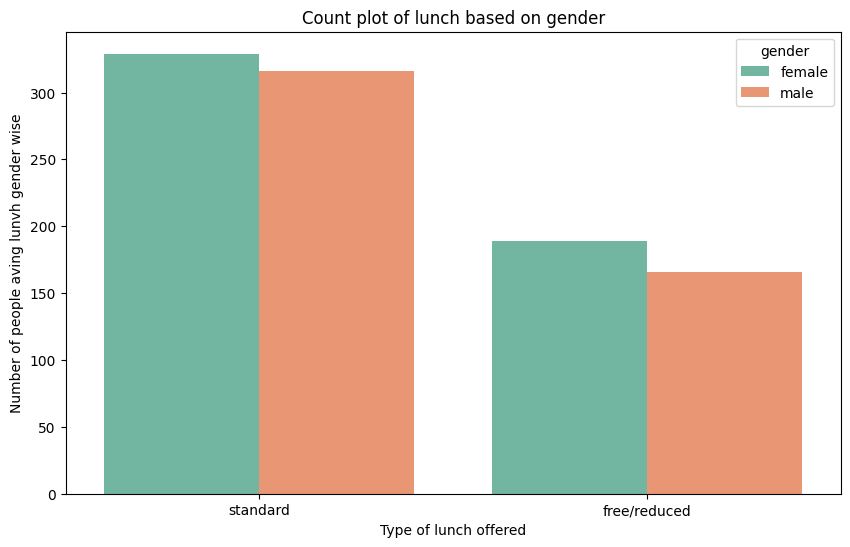

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='lunch', hue='gender', palette='Set2')
plt.title('Count plot of lunch based on gender')
plt.xlabel('Type of lunch offered')
plt.ylabel('Number of people aving lunvh gender wise')


In [26]:
unique_vals_column['test_preparation_course']

array(['none', 'completed'], dtype=object)

<Axes: xlabel='test_preparation_course', ylabel='count'>

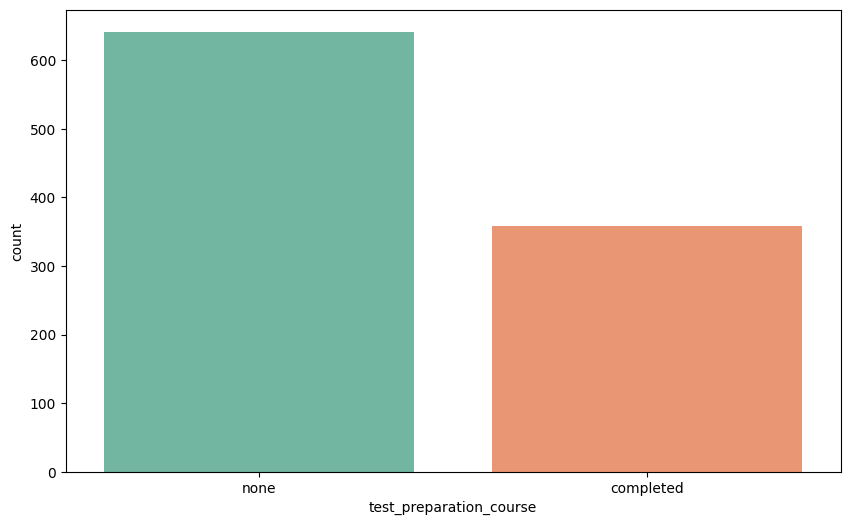

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='test_preparation_course',palette='Set2')

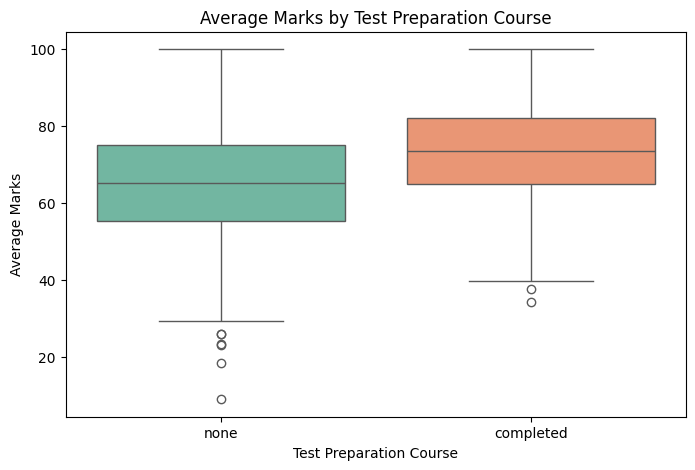

In [37]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='test_preparation_course', y='average_score',palette='Set2')
plt.title('Average Marks by Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Marks')
plt.show()


In [41]:
val=df.groupby('test_preparation_course')['average_score'].mean()
val

test_preparation_course
completed    72.669460
none         65.038941
Name: average_score, dtype: float64

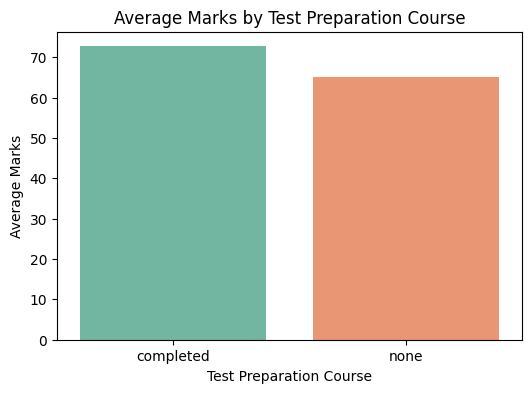

In [45]:
plt.figure(figsize=(6,4))
sns.barplot(x=val.index, y=val.values, palette='Set2')
plt.title('Average Marks by Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Marks')
plt.show()

The boxplot represents the the students who have taken preperation course have performed better. 

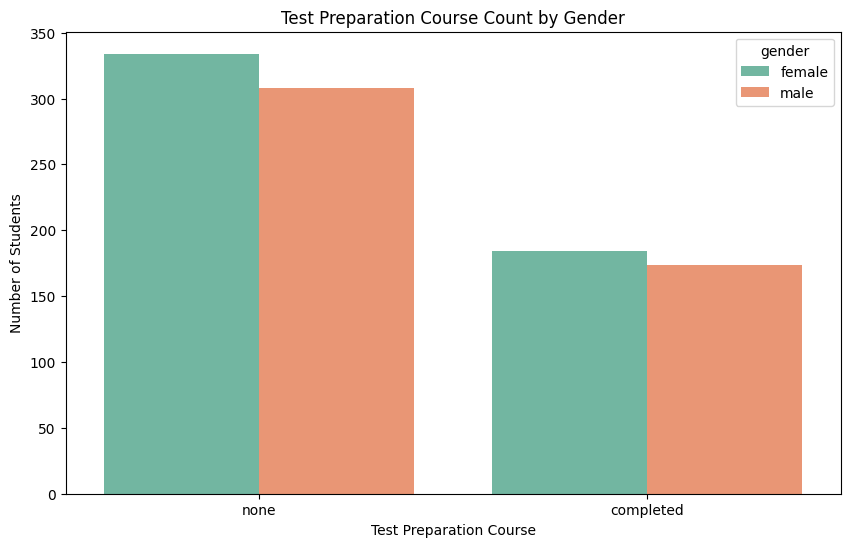

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='test_preparation_course', hue='gender', palette='Set2')
plt.title('Test Preparation Course Count by Gender')
plt.xlabel('Test Preparation Course')
plt.ylabel('Number of Students')
plt.show()